Import all relevant packages and data from csv

In [2]:
#from datasets import *

from qiskit import BasicAer
from qiskit import Aer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint


In [3]:
En = np.genfromtxt('En.csv', delimiter = ',', usecols=range(1), unpack = True)
van = np.genfromtxt('van.csv', delimiter = ',', usecols=range(1), unpack = True)
gl = np.genfromtxt('gl.csv', delimiter = ',', usecols=range(81), unpack = True)

Plot data (akin to analysis from MATALB code)

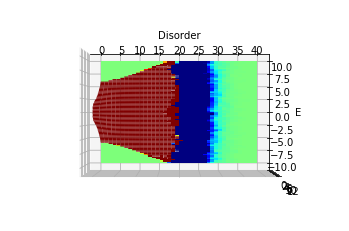

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(van, En)

surf = ax.plot_surface(X, Y, gl, rstride=1, cstride=1, cmap=cm.jet,vmin=-0.000005, vmax=0.000005, antialiased=True)
ax.view_init(azim=-90, elev=90)

ax.set_ylabel('E')
ax.set_xlabel('Disorder')

#Show the plot
plt.show()

1st attempt: train on all data

In [7]:
delta = 1E-6;

insulator = []
conductor = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            if (val > 0):
                conductor.append([En[i], van[j]])
            else:
                insulator.append([En[i], van[j]])

In [8]:
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)

training_data = {'Conductor': np.asarray(conductor_train), 'Insulator': np.asarray(insulator_train)}
test_data = {'Conductor': np.asarray(conductor_test), 'Insulator': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['Conductor'], test_data['Insulator']))

In [20]:
params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('qasm_simulator')
algo_input = ClassificationInput(training_data, test_data, total_array)
result2 = run_algorithm(params, algo_input, backend=backend)

In [21]:
print("testing success ratio: {}".format(result2['testing_accuracy']))

testing success ratio: 0.5550724637681159


2nd Attempt: Despite long training, above results barely better than random. Reduce size of data 

In [9]:
delta = 1E-6;

insulator = []
conductor = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta and (van[j] >= 10 or van[j] <= 30  ):
            if (val > 0):
                conductor.append([En[i], van[j]])
            else:
                insulator.append([En[i], van[j]])

In [10]:
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

In [29]:
start = time.time()

params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('qasm_simulator')
algo_input = ClassificationInput(training_data, test_data, total_array)
result3 = run_algorithm(params, algo_input, backend=backend)

end = time.time()
print(end - start)

133847.46618533134


In [30]:
print("testing success ratio: {}".format(result2['testing_accuracy']))

testing success ratio: 0.5550724637681159


In [11]:
start = time.time()

params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 3, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('qasm_simulator')
algo_input = ClassificationInput(training_data, test_data, total_array)
result4 = run_algorithm(params, algo_input, backend=backend)

end = time.time()
print(end - start)

202743.02877664566


In [16]:
print("testing success ratio: {}".format(result4['testing_accuracy']))

testing success ratio: 0.5391304347826087


In [13]:
start = time.time()

params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 4, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('qasm_simulator')
algo_input = ClassificationInput(training_data, test_data, total_array)
result5 = run_algorithm(params, algo_input, backend=backend)

end = time.time()
print(end - start)

288537.92876672745


In [15]:
print("testing success ratio: {}".format(result5['testing_accuracy']))

testing success ratio: 0.5391304347826087


5th attempt: reduce data size even further, original parameters

In [20]:
delta = 1E-6;

insulator = []
conductor = []


for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta and (van[j] >= 17 or van[j] <= 23):
            if (val > 0):
                conductor.append([En[i], van[j]])
            else:
                insulator.append([En[i], van[j]])

In [36]:
start = time.time()

params = {
    'problem': {'name': 'classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM'},
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('qasm_simulator')
algo_input = ClassificationInput(training_data, test_data, total_array)
result6 = run_algorithm(params, algo_input, backend=backend)

end = time.time()
print(end - start)

NameError: name 'training_input' is not defined

In [23]:
print("testing success ratio: {}".format(result6['testing_accuracy']))

testing success ratio: 0.5550724637681159


In [24]:
delta = 1E-6;

data = []
labels = []

for i in range(0, gl.shape[0]):
    for j in range(0, gl.shape[1]):
        val = gl[i, j]
        if np.abs(val) > delta:
            data.append([En[i], van[j]])            
            if (val > 0):
                labels.append(0)
            else:
                labels.append(1)

In [25]:
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [26]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9579100145137881


In [84]:
delta = 1E-6;

insulator = []
conductor = []

for l in range(0, 60):
    i = randint(0, gl.shape[0]-1)
    j = randint(0, gl.shape[1]-1)
    val = gl[i, j]
    if np.abs(val) > delta:
            if (val > 0):
                conductor.append([van[j], En[i]])
            else:
                insulator.append([van[j], En[i]])

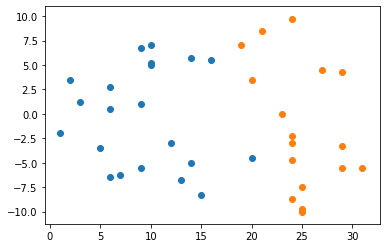

In [85]:
c_x_val = [x[0] for x in conductor]
c_y_val = [x[1] for x in conductor]
i_x_val = [x[0] for x in insulator]
i_y_val = [x[1] for x in insulator]


plt.scatter(c_x_val, c_y_val)
plt.scatter(i_x_val, i_y_val)
plt.show()

In [86]:
conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

In [87]:
start = time.time()

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

result7 = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

20.83159589767456


In [82]:
print("testing success ratio: {}".format(result7['testing_accuracy']))
#print("preduction of datapoints:")
#print("ground truth: {}".format(map_label_to_class_name(total_array, qsvm.label_to_class)))
#print("prediction:   {}".format(result7['predicted_classes']))

testing success ratio: 0.35714285714285715


Ran this several times, success ratio goes from 30 to 90%. Run several times and compile results

In [5]:
def run(num_points, deg):
    delta = 1E-6;

    insulator = []
    conductor = []

    for l in range(0, num_points):
        i = randint(0, gl.shape[0]-1)
        j = randint(0, gl.shape[1]-1)
        val = gl[i, j]
        if np.abs(val) > delta:
                if (val > 0):
                    conductor.append([van[j], En[i]])
                else:
                    insulator.append([van[j], En[i]])
                    
    
    conductor_train, conductor_test = train_test_split(conductor, test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(insulator, test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

    total_array = np.concatenate((test_data['A'], test_data['B']))
    
    
    feature_map = SecondOrderExpansion(feature_dimension=2, depth=deg, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data)

    backend = Aer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    result8 = qsvm.run(quantum_instance)
    
    print("Number of data points:" + str(num_points))
    print("testing success ratio: {}".format(result8['testing_accuracy']))
    print('\n')

In [77]:
for i in np.arange(30, 200, 5):
    for j in range(0, 5):
        run(i)

Number of data points:30
testing success ratio: 0.5


Number of data points:30
testing success ratio: 0.2857142857142857


Number of data points:30
testing success ratio: 0.7142857142857143


Number of data points:30
testing success ratio: 0.6666666666666666


Number of data points:30
testing success ratio: 0.3333333333333333


Number of data points:35
testing success ratio: 0.14285714285714285


Number of data points:35
testing success ratio: 0.42857142857142855


Number of data points:35
testing success ratio: 0.5


Number of data points:35
testing success ratio: 0.25


Number of data points:35
testing success ratio: 0.625


Number of data points:40
testing success ratio: 0.4444444444444444


Number of data points:40
testing success ratio: 0.3333333333333333


Number of data points:40
testing success ratio: 0.375


Number of data points:40
testing success ratio: 0.75


Number of data points:40
testing success ratio: 0.5


Number of data points:45
testing success ratio: 0.636363636363

Number of data points:155
testing success ratio: 0.5161290322580645


Number of data points:155
testing success ratio: 0.5833333333333334


Number of data points:155
testing success ratio: 0.3888888888888889


Number of data points:155
testing success ratio: 0.6129032258064516


Number of data points:160
testing success ratio: 0.6


Number of data points:160
testing success ratio: 0.5714285714285714


Number of data points:160
testing success ratio: 0.48484848484848486


Number of data points:160
testing success ratio: 0.4411764705882353


Number of data points:160
testing success ratio: 0.5454545454545454


Number of data points:165
testing success ratio: 0.5142857142857142


Number of data points:165
testing success ratio: 0.47058823529411764


Number of data points:165
testing success ratio: 0.5405405405405406


Number of data points:165
testing success ratio: 0.4444444444444444


Number of data points:165
testing success ratio: 0.59375


Number of data points:170
testing success ra

In [91]:
for i in np.arange(30, 200, 5):
    for j in range(0, 5):
        run(i, 3)

Number of data points:30
testing success ratio: 0.42857142857142855


Number of data points:30
testing success ratio: 0.7142857142857143


Number of data points:30
testing success ratio: 0.8571428571428571


Number of data points:30
testing success ratio: 0.3333333333333333


Number of data points:30
testing success ratio: 0.2857142857142857


Number of data points:35
testing success ratio: 0.625


Number of data points:35
testing success ratio: 0.5


Number of data points:35
testing success ratio: 0.7142857142857143


Number of data points:35
testing success ratio: 0.5555555555555556


Number of data points:35
testing success ratio: 0.375


Number of data points:40
testing success ratio: 0.625


Number of data points:40
testing success ratio: 0.6666666666666666


Number of data points:40
testing success ratio: 0.4


Number of data points:40
testing success ratio: 0.6666666666666666


Number of data points:40
testing success ratio: 0.4444444444444444


Number of data points:45
testing 

Number of data points:155
testing success ratio: 0.4857142857142857


Number of data points:155
testing success ratio: 0.4722222222222222


Number of data points:155
testing success ratio: 0.5405405405405406


Number of data points:155
testing success ratio: 0.5526315789473685


Number of data points:155
testing success ratio: 0.3548387096774194


Number of data points:160
testing success ratio: 0.46875


Number of data points:160
testing success ratio: 0.5172413793103449


Number of data points:160
testing success ratio: 0.4375


Number of data points:160
testing success ratio: 0.4864864864864865


Number of data points:160
testing success ratio: 0.3055555555555556


Number of data points:165
testing success ratio: 0.3888888888888889


Number of data points:165
testing success ratio: 0.4166666666666667


Number of data points:165
testing success ratio: 0.5405405405405406


Number of data points:165
testing success ratio: 0.5142857142857142


Number of data points:165
testing success r

In [6]:
for i in np.arange(30, 200, 5):
    for j in range(0, 5):
        run(i, 4)

Number of data points:30
testing success ratio: 0.5


Number of data points:30
testing success ratio: 0.5


Number of data points:30
testing success ratio: 0.2857142857142857


Number of data points:30
testing success ratio: 0.75


Number of data points:30
testing success ratio: 0.3333333333333333


Number of data points:35
testing success ratio: 0.75


Number of data points:35
testing success ratio: 0.7


Number of data points:35
testing success ratio: 1.0


Number of data points:35
testing success ratio: 0.5714285714285714


Number of data points:35
testing success ratio: 0.125


Number of data points:40
testing success ratio: 0.2222222222222222


Number of data points:40
testing success ratio: 0.5


Number of data points:40
testing success ratio: 0.6666666666666666


Number of data points:40
testing success ratio: 0.3333333333333333


Number of data points:40
testing success ratio: 0.36363636363636365


Number of data points:45
testing success ratio: 0.3333333333333333


Number of d

Number of data points:155
testing success ratio: 0.696969696969697


Number of data points:155
testing success ratio: 0.47058823529411764


Number of data points:155
testing success ratio: 0.696969696969697


Number of data points:155
testing success ratio: 0.47058823529411764


Number of data points:160
testing success ratio: 0.5833333333333334


Number of data points:160
testing success ratio: 0.5588235294117647


Number of data points:160
testing success ratio: 0.4722222222222222


Number of data points:160
testing success ratio: 0.5


Number of data points:160
testing success ratio: 0.3888888888888889


Number of data points:165
testing success ratio: 0.4864864864864865


Number of data points:165
testing success ratio: 0.5454545454545454


Number of data points:165
testing success ratio: 0.45454545454545453


Number of data points:165
testing success ratio: 0.5882352941176471


Number of data points:165
testing success ratio: 0.6285714285714286


Number of data points:170
testing 